C:\Users\BARA\miniconda3\envs\hahahihi\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


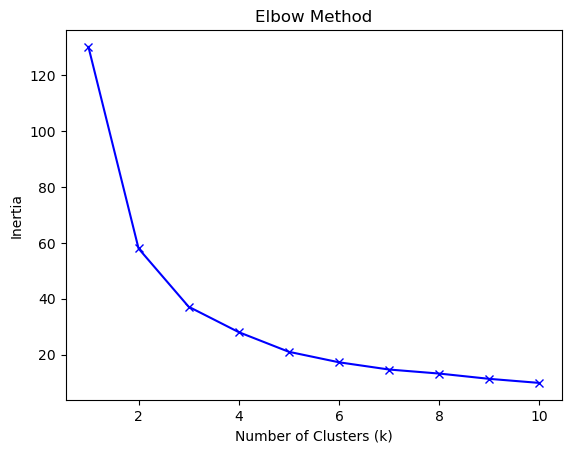

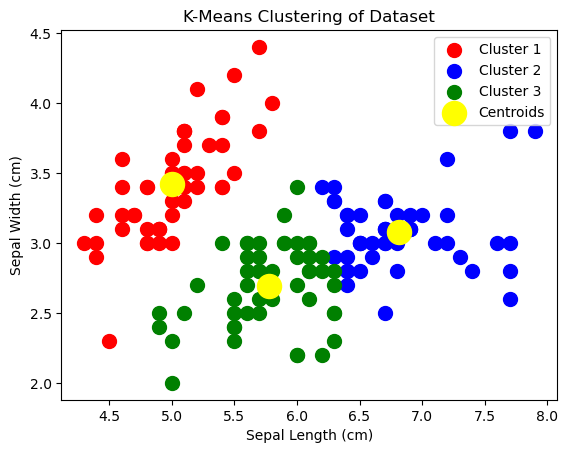

Davies-Bouldin Score: 0.7723946071413271


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Load the CSV file
data = pd.read_csv('IRIS.csv')

# Extract the sepal length and width attributes
sepal_data = data[['sepal_length', 'sepal_width']].values

# Determine the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sepal_data)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Choose the optimal number of clusters based on the plot
optimal_k = 3

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(sepal_data)

# Get the cluster labels
labels = kmeans.labels_

# Plot the clusters
plt.scatter(sepal_data[labels == 0, 0], sepal_data[labels == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(sepal_data[labels == 1, 0], sepal_data[labels == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(sepal_data[labels == 2, 0], sepal_data[labels == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('K-Means Clustering of Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

# Calculate the Davies-Bouldin score
db_score = davies_bouldin_score(sepal_data, labels)
print("Davies-Bouldin Score:", db_score)
